# DAT200 CA3 2023

Kaggle username: 

### Imports

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from scipy import stats

### Reading data

In [2]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

### Data exploration and visualisation

In [3]:
raw_train.head(10)

Unnamed: 0        ph    Hardness        Solids  Chloramines     Sulfate  \
0           0  8.699665  206.379671  20051.663488     7.725750  360.083725   
1           1  6.563410  175.697020  16117.048403     6.084136  333.778060   
2           2  6.817023  246.660238  19537.573853     9.051732  317.237871   
3           3  7.449572  146.902210  19924.425670     7.950549  444.198272   
4           4  5.300541  212.435573  12624.741570     7.313756  350.452182   
5           5  6.956687  218.825756  23448.018319     7.054301  307.641101   
6           6  9.530134  226.708359  14861.325547     5.271028  350.174163   
7           7  3.988311  199.099454  19456.287932     7.232670  415.912592   
8           8  7.228313  183.213812  24140.271278     5.657258  269.612819   
9           9  7.417612  170.809921  16185.839099     6.059446  330.667935   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Drinkable  
0    408.388221       14.859047        76.846364   5.710412          0  
1    412.632708       11.222295        73.502793   4.459252          1  
2    464.209418       14.822665        68.918597   4.602564          0  
3    554.679850       19.483985        72.081011   3.809883          0  
4    356.512171       19.213205        99.351837   3.841719          1  
5    331.847552        9.023040        48.127138   3.782870          1  
6    327.386894       11.315137        72.570323   3.608835          0  
7    383.536614       16.029647        91.014746   5.075183          0  
8    410.599068       12.156530        77.048602   4.396091          1  
9    560.557519       11.487874        77.512744   3.957272          1

In [4]:
raw_test.head(3)

Unnamed: 0        ph    Hardness        Solids  Chloramines     Sulfate  \
0           0  6.291652  186.073761  13205.680697     6.045361  367.989091   
1           1  4.884432  106.394326  10724.202982     5.549662  369.764389   
2           2  5.488289  186.185584  29818.481906     6.609243  353.107564   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0    295.308581       11.170456        49.785878   5.328826  
1    299.468182       12.333352        77.101277   4.285049  
2    344.806801       19.386249        65.179697   2.372528

In [34]:
print(raw_train.isnull().sum())

Unnamed: 0         0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Drinkable          0
dtype: int64


In [5]:
train = raw_train.iloc[:,1:]
test = raw_test.iloc[:,1:]
train.shape
# removing the unnamed feature 

(2040, 10)

In [6]:
train.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2040.000000  2040.000000   2040.000000  2040.000000  2040.000000   
mean      7.045930   195.998874  22005.555875     7.111529   333.349677   
std       1.597071    34.284142   8683.483885     1.616997    45.805572   
min       0.216124    69.817622    336.989742     1.321327   171.196409   
25%       6.033722   174.968973  15566.304215     6.111137   304.722266   
50%       6.958491   197.260049  20977.941519     7.098779   335.207355   
75%       7.998105   216.784623  26971.346790     8.078323   360.990547   
max      14.700000   301.471218  58101.437939    13.286030   483.112422   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity    Drinkable  
count   2040.000000     2040.000000      2040.000000  2040.000000  2040.000000  
mean     424.783924       14.240333        66.311518     3.964849     0.500000  
std       83.757539        3.455875        16.485962     0.792210     0.500123  
min      191.538750        2.090000         8.148162     1.417596     0.000000  
25%      361.944320       11.829769        55.539686     3.423092     0.000000  
50%      419.621502       14.224112        66.318316     3.957272     0.500000  
75%      481.204843       16.665868        77.048602     4.487263     1.000000  
max      791.009751       28.357042       126.031581     6.819486     1.000000

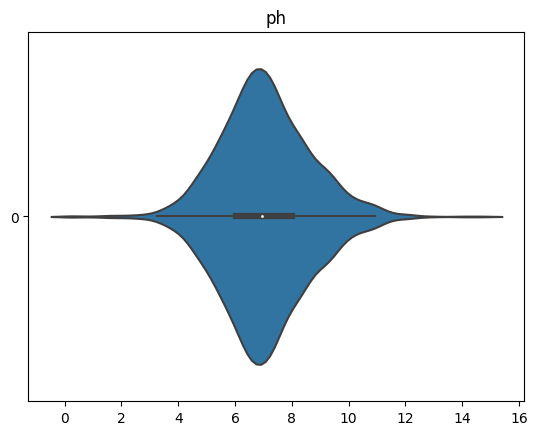

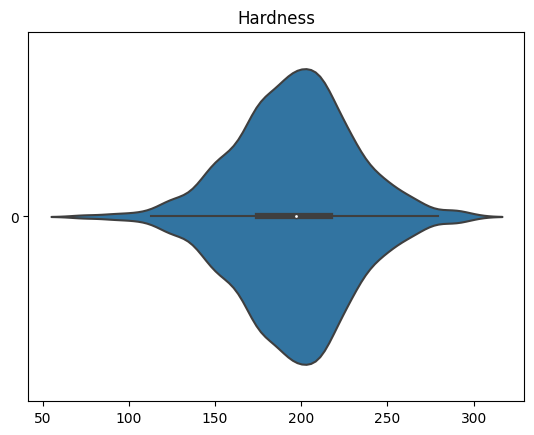

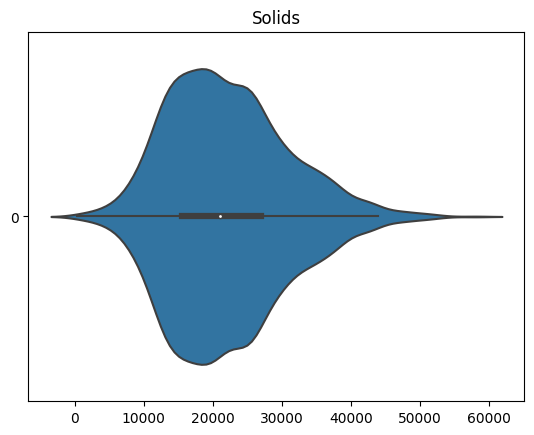

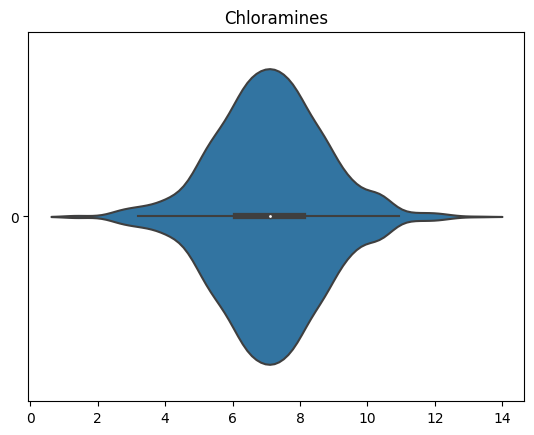

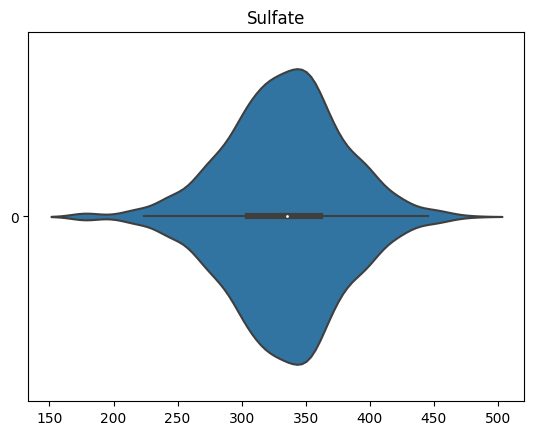

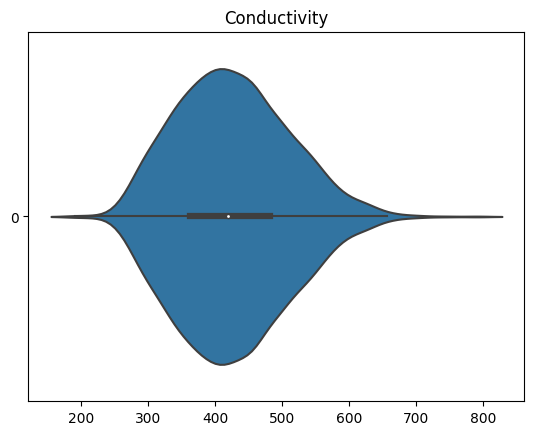

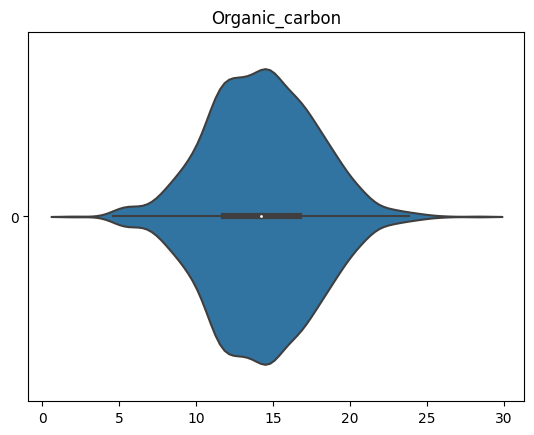

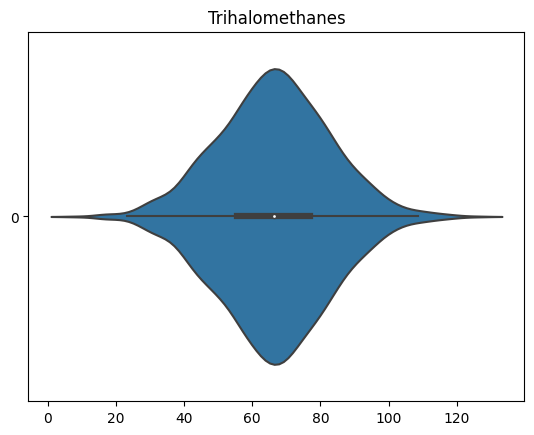

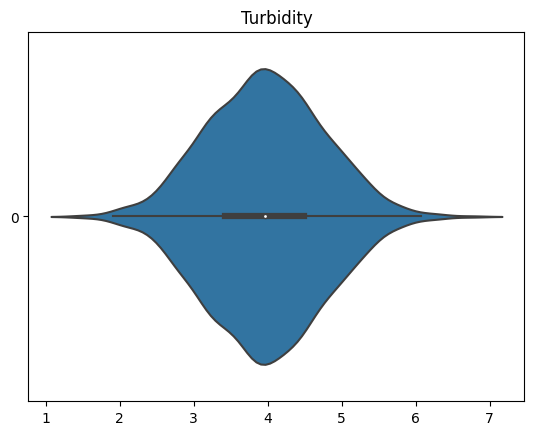

In [7]:
for i in train.columns[:-1]:
    plt.figure()
    plt.title(i)
    sns.violinplot(data=raw_train[i], orient='h')
    plt.show()


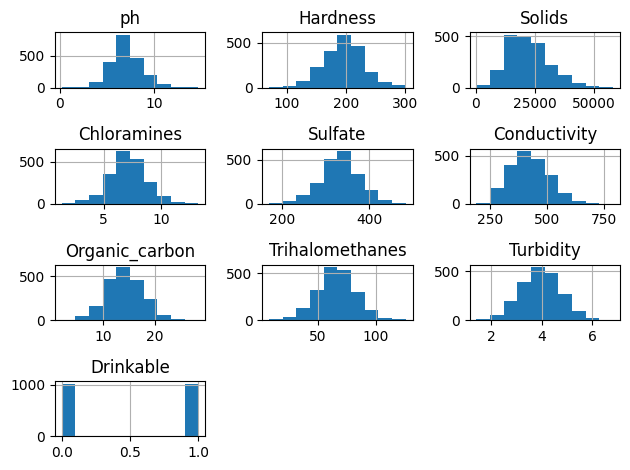

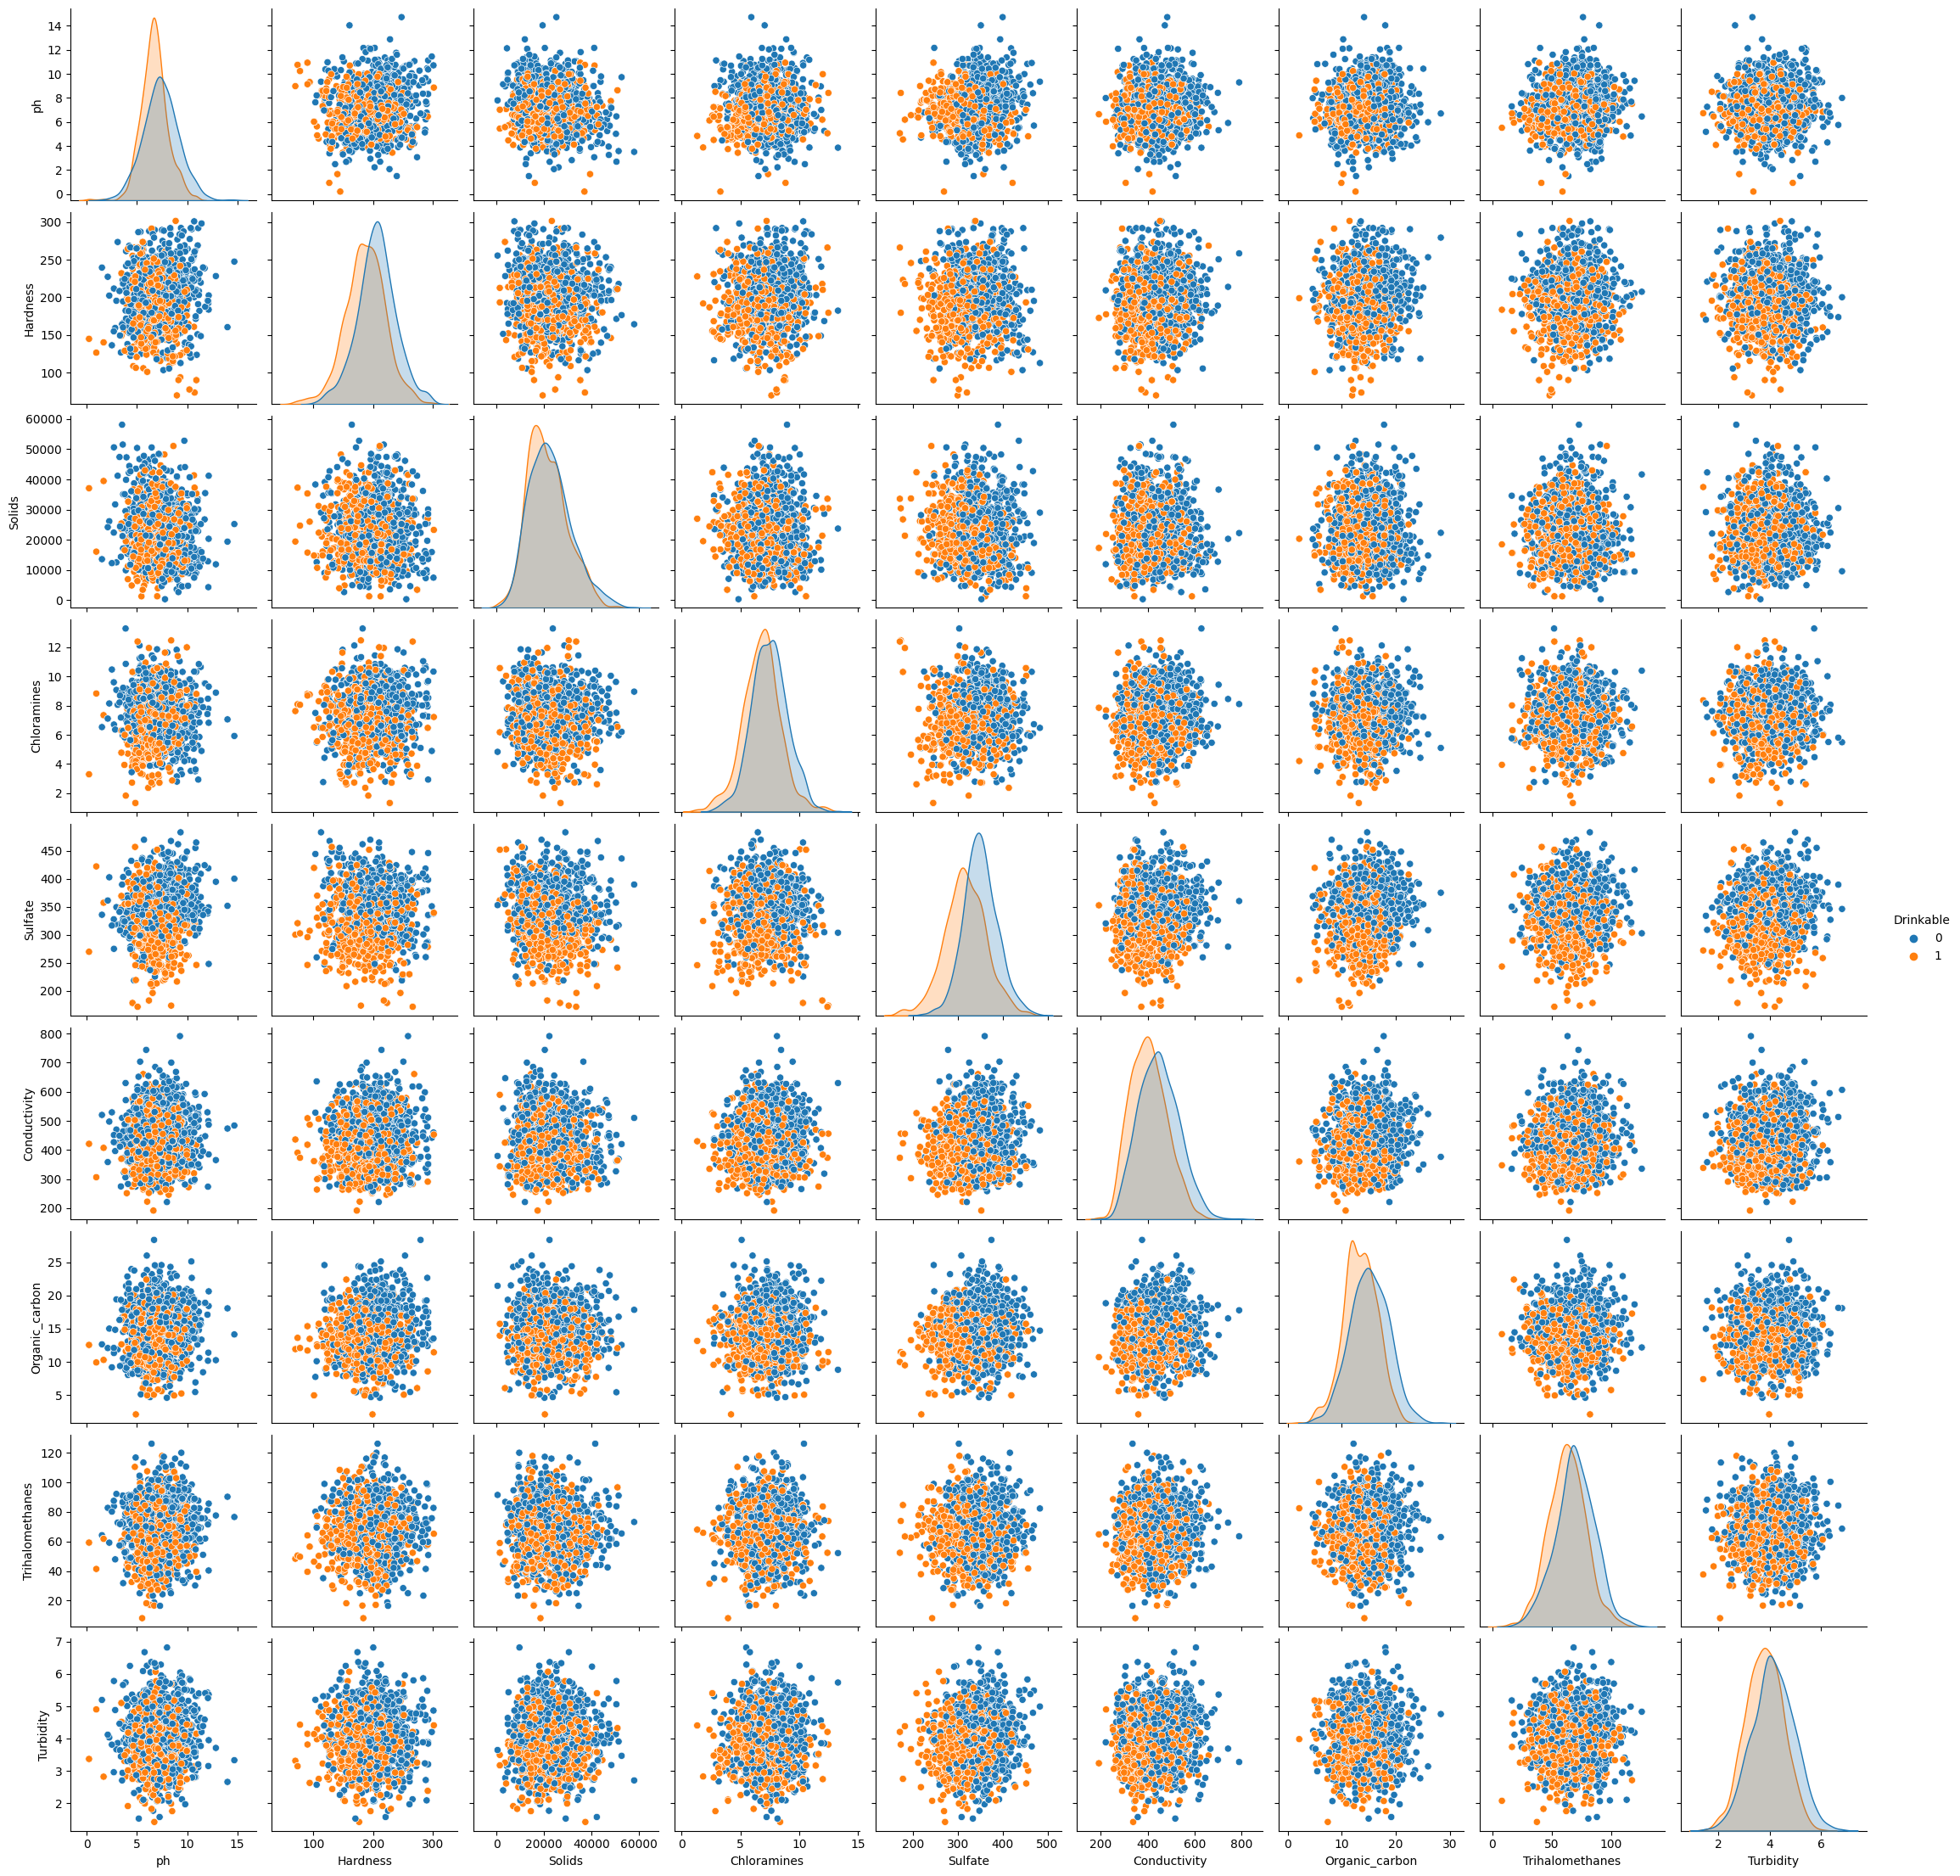

In [8]:
# Histograms below

train.hist()
plt.tight_layout()
plt.show()

# Pairplots below
sns.pairplot(train, hue='Drinkable')

### Data cleaning

In [15]:
# Using Z-scores to filter out the outliers. Z-score < 2 is 95% of the data
# Z-score < 3 is 98% of the data

z_scores = stats.zscore(train)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

# outliers = (abs_z_scores >= 2).all(axis=1) Was used with the IterativeImputer but did not prove useful

cleaned_data = train[filtered_entries]

In [40]:
index_ph = cleaned_data[(cleaned_data['ph'] <6)].index
index_ph = cleaned_data[(cleaned_data['ph'] >11)].index
cleaned_data.drop(index_ph, inplace=True)
cleaned_data.head(8)

C:\Users\mkrtc\AppData\Local\Temp\ipykernel_10096\1050731358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(index_ph, inplace=True)


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  8.699665  206.379671  20051.663488     7.725750  360.083725    408.388221   
1  6.563410  175.697020  16117.048403     6.084136  333.778060    412.632708   
2  6.817023  246.660238  19537.573853     9.051732  317.237871    464.209418   
3  7.449572  146.902210  19924.425670     7.950549  444.198272    554.679850   
5  6.956687  218.825756  23448.018319     7.054301  307.641101    331.847552   
6  9.530134  226.708359  14861.325547     5.271028  350.174163    327.386894   
8  7.228313  183.213812  24140.271278     5.657258  269.612819    410.599068   
9  7.417612  170.809921  16185.839099     6.059446  330.667935    560.557519   

   Organic_carbon  Trihalomethanes  Turbidity  Drinkable  
0       14.859047        76.846364   5.710412          0  
1       11.222295        73.502793   4.459252          1  
2       14.822665        68.918597   4.602564          0  
3       19.483985        72.081011   3.809883          0  
5        9.023040        48.127138   3.782870          1  
6       11.315137        72.570323   3.608835          0  
8       12.156530        77.048602   4.396091          1  
9       11.487874        77.512744   3.957272          1

### Data exploration after cleaning

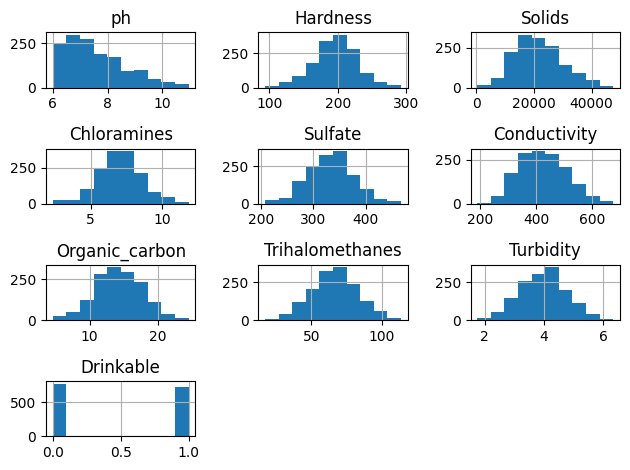

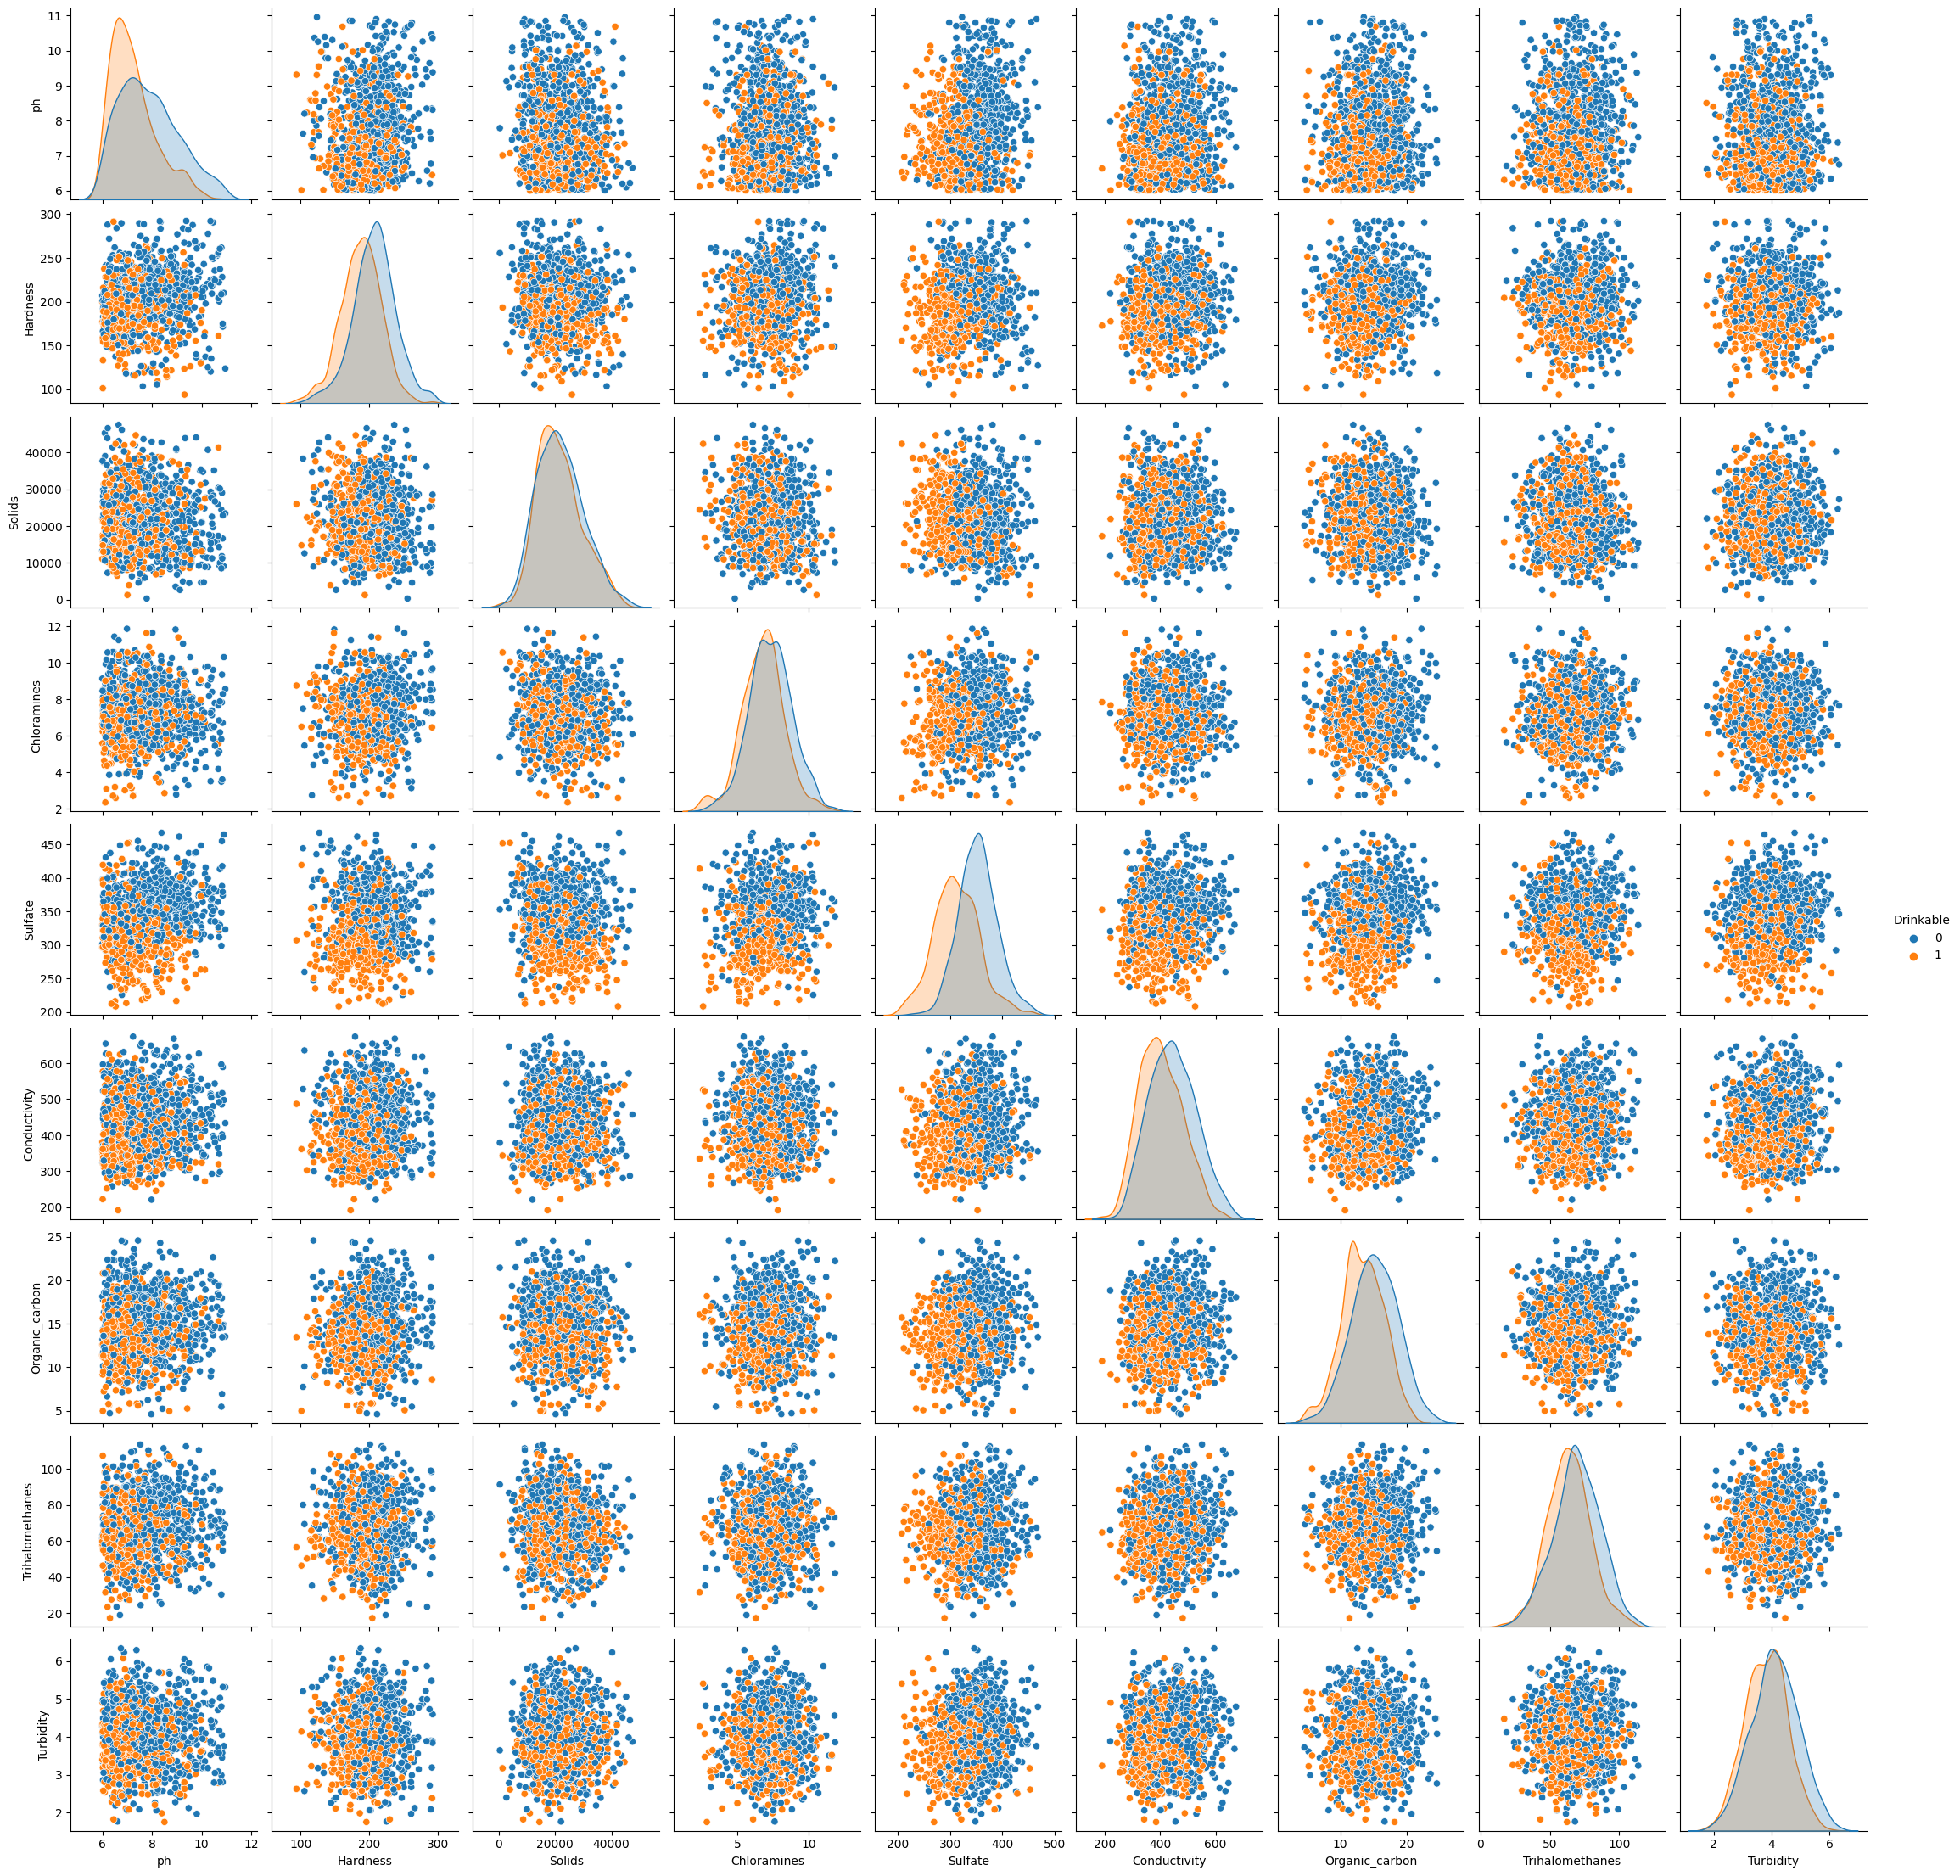

In [41]:
# Histograms below

cleaned_data.hist()
plt.tight_layout()
plt.show()

# Pairplots below
sns.pairplot(cleaned_data, hue='Drinkable')

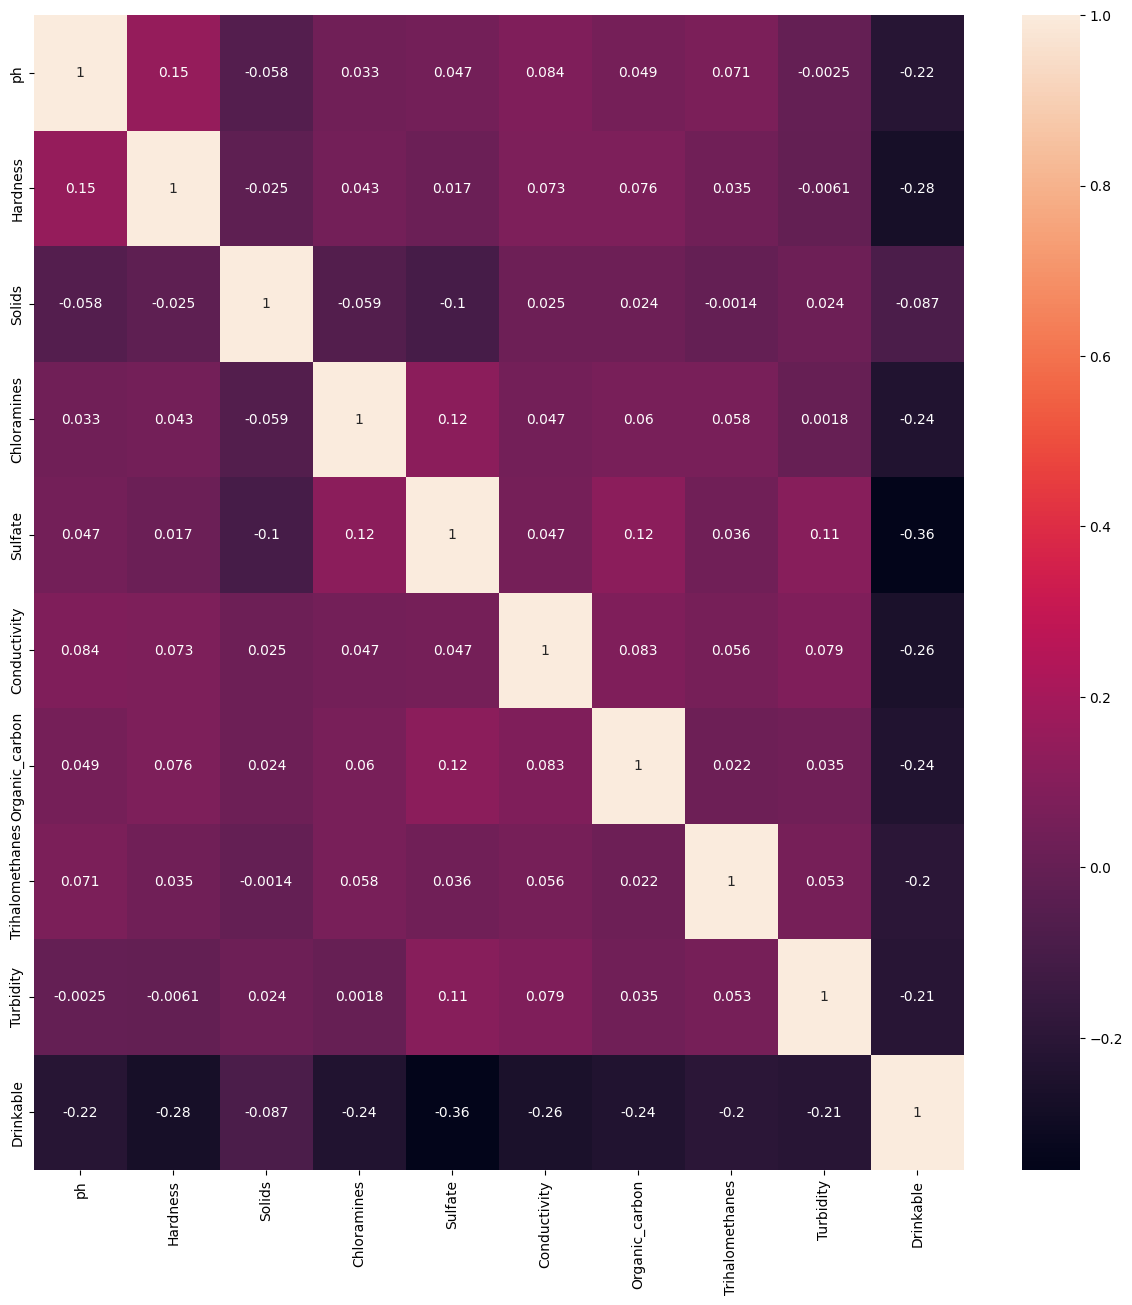

In [29]:
plt.figure(figsize=(15, 15)) # Making it big for easier inspection
corr_matrix = cleaned_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Data preprocessing

In [42]:
X = cleaned_data.drop(["Drinkable"], axis=1)
y = cleaned_data["Drinkable"]

#### Train test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=21)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1039, 9)
X_test:  (446, 9)
y_train:  (1039,)
y_test:  (446,)


#### Scaling

In [44]:
# Scaling the data with StandardScaler()

sc = StandardScaler()
sc.fit(X_train)


# Transform (standardise) both X_train and X_test with mean and STD from 
# training data

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Modelling

### Logistic Regression

In [24]:
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=21,
                       n_jobs=-1),).fit(X_train_sc, y_train)
    
lr.predict(X_test_sc)



print('Logistic Regression training data accuracy: {0:.4f}'.format(
    lr.score(X_train_sc, y_train)))

print('Logistic Regression test data accuracy: {0:.4f}'.format(
    lr.score(X_test_sc, y_test)))

Logistic Regression training data accuracy: 0.7982
Logistic Regression test data accuracy: 0.7853


### Gradient Boosting Classifier

In [30]:
gbc_pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=21))

param_dist = [{'gradientboostingclassifier__learning_rate': [0.01],
'gradientboostingclassifier__n_estimators':[500],
'gradientboostingclassifier__min_samples_leaf': [3],
'gradientboostingclassifier__max_depth':[6],
'gradientboostingclassifier__max_features':[1.0]}]

g_search_gbc = GridSearchCV(estimator=gbc_pipe,
                                     param_grid=param_dist,
                                     scoring='r2',
                                     cv=5, 
                                     n_jobs=-1)

In [31]:
g_search_gbc.fit(X_train_sc, y_train) # Finding the best parameters for GBR

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=21))]),
             n_jobs=-1,
             param_grid=[{'gradientboostingclassifier__learning_rate': [0.01],
                          'gradientboostingclassifier__max_depth': [6],
                          'gradientboostingclassifier__max_features': [1.0],
                          'gradientboostingclassifier__min_samples_leaf': [3],
                          'gradientboostingclassifier__n_estimators': [500]}],
             scoring='r2')

In [32]:
gbc_best =  g_search_gbc.best_estimator_
gbc_best.fit(X_train_sc, y_train) # Fitting the best parameters into the model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                                            max_features=1.0,
                                            min_samples_leaf=3,
                                            n_estimators=500,
                                            random_state=21))])

In [33]:
y_pred = gbc_best.predict(X_test_sc)

print('Gradient boosting regressor training data accuracy: {0:.2f}'.format(gbc_best.score(X_train_sc, y_train)))

print('Gradient boosting regressor test data accuracy: {0:.2f}'.format(gbc_best.score(X_test_sc, y_test)))

Gradient boosting regressor training data accuracy: 0.99
Gradient boosting regressor test data accuracy: 0.85


### Random Forest Classifier

In [45]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=250,
                                random_state=21,
                                n_jobs=-1,
                                bootstrap=True
                               )

forest.fit(X_train_sc, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250, n_jobs=-1,
                       random_state=21)

In [46]:
print('Forest training data accuracy: {0:.2f}'.format(forest.score(X_train_sc, y_train)))

print('Forest test data accuracy: {0:.2f}'.format(forest.score(X_test_sc, y_test)))

Forest training data accuracy: 1.00
Forest test data accuracy: 0.86


### Final Evaluation

### Kaggle submission